# 下準備

## ライブラリのインポート

In [39]:
# ライブラリのインポート
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import requests
from termcolor import colored as cl

## 表示設定

In [7]:
# 表示設定
plt.rcParams['figure.figsize'] = (20,6)

## データの作成

### 経済データの作成

In [93]:
# 定数の設定
start = dt.date(2013, 10, 1)
end = dt.date(2023, 10, 1)

# 経済データの取得
# なんかのデータ
df_economic_data = web.DataReader('JTSJOL', 'fred', start, end)
# タマゴ
df_economic_STEEL_PRICE = web.DataReader('WPU10170502', 'fred', start, end)
df_economic_REGULAR_GAS_PRICE = web.DataReader('GASREGW', 'fred', start, end)
# 車の売上
df_economic_TOTAL_VIHECLE_SALES = web.DataReader('TOTALSA', 'fred', start, end)
# ニワトリ
df_economic_GDP = web.DataReader('GDP', 'fred', start, end) # 3ヶ月に一回


df_economic_REGULAR_GAS_PRICE

,GASREGW
DATE,
2013-10-07,3.367
2013-10-14,3.354
2013-10-21,3.360
2013-10-28,3.294
2013-11-04,3.265
...,...
2023-08-28,3.813
2023-09-04,3.807
2023-09-11,3.822


### 日次データの作成

In [70]:
API_KEY = '2IPXB7ZSYNPRUB6Y'

# 定数の設定
start = dt.datetime(2013, 10, 1)
end = dt.datetime(2023, 10, 1)

# 複数の銘柄のリスト
tickers = ['TYO', 'F', 'GM', 'HMC', 'STLA']  # 例として4つの銘柄を取得します。必要に応じてリストを変更してください。

# データフレームの初期化
df_stock_da = pd.DataFrame()

# 各銘柄のデータ取得
for ticker in tickers:
    df_stock = web.DataReader(
        ticker,
        'av-daily',
        start,
        end,
        api_key=API_KEY
    )
    
    # closeの価格だけを取得し、カラム名を銘柄名に変更
    df_stock = df_stock[['close']].rename(columns={'close': ticker})
    
    # 合成データフレームへの追加
    if df_stock_da.empty:
        df_stock_da = df_stock
    else:
        df_stock_da = df_stock_da.join(df_stock)

df_stock_da

,TYO,F,GM,HMC,STLA
2013-10-01,24.750,17.19,35.91,38.22,8.06
2013-10-02,24.629,17.21,35.94,38.28,8.06
2013-10-03,24.580,16.95,35.29,38.07,8.06
2013-10-04,24.820,17.09,35.70,38.37,8.35
2013-10-07,24.630,16.81,35.18,37.91,8.60
...,...,...,...,...,...
2023-09-25,15.210,12.58,33.06,35.21,19.24
2023-09-26,15.280,12.43,32.26,34.73,18.84
2023-09-27,15.510,12.39,32.35,34.99,18.81
2023-09-28,15.390,12.56,33.16,34.84,19.27


### 週次データの作成

In [77]:
# データフレームの初期化
df_stock_we = pd.DataFrame()

# 各銘柄のデータ取得
for ticker in tickers:
    df_stock = web.DataReader(
        ticker,
        'av-weekly',
        start,
        end,
        api_key=API_KEY
    )
    
    # closeの価格だけを取得し、カラム名を銘柄名に変更
    df_stock = df_stock[['close']].rename(columns={'close': ticker})
    
    # 合成データフレームへの追加
    if df_stock_we.empty:
        df_stock_we = df_stock
    else:
        df_stock_we = df_stock_we.join(df_stock)

df_stock_we

,TYO,F,GM,HMC,STLA
2013-10-04,24.8200,17.09,35.70,38.37,8.35
2013-10-11,24.9500,17.11,35.35,40.12,8.65
2013-10-18,24.2500,17.53,35.89,40.40,8.30
2013-10-25,23.7399,17.60,35.59,39.65,8.30
2013-11-01,24.3001,16.89,37.39,40.10,7.60
...,...,...,...,...,...
2023-09-01,14.2500,12.14,33.54,32.33,18.23
2023-09-08,14.4100,12.30,32.95,33.55,18.23
2023-09-15,14.6100,12.61,33.95,35.34,19.25
2023-09-22,14.9100,12.43,32.58,35.23,19.35


### 月次データの作成

In [ ]:
# データフレームの初期化
df_stock_mo = pd.DataFrame()

# 各銘柄のデータ取得
for ticker in tickers:
    df_stock = web.DataReader(
        ticker,
        'av-daily',
        start,
        end,
        api_key=API_KEY
    )
    
    # closeの価格だけを取得し、カラム名を銘柄名に変更
    df_stock = df_stock[['close']].rename(columns={'close': ticker})
    
    # 合成データフレームへの追加
    if df_stock_mo.empty:
        df_stock_mo = df_stock
    else:
        df_stock_mo = df_stock_mo.join(df_stock)

df_stock_mo

In [78]:
print('Stock Daily data')
print(df_stock_da.head())
print('-----------------')
print('Stock Weekly data')
print(df_stock_we.head())
print('-----------------')
print('Stock Monthly data')
print(df_stock_mo.head())

Stock Daily data
               TYO      F     GM    HMC  STLA
2013-10-01  24.750  17.19  35.91  38.22  8.06
2013-10-02  24.629  17.21  35.94  38.28  8.06
2013-10-03  24.580  16.95  35.29  38.07  8.06
2013-10-04  24.820  17.09  35.70  38.37  8.35
2013-10-07  24.630  16.81  35.18  37.91  8.60
-----------------
Stock Weekly data
                TYO      F     GM    HMC  STLA
2013-10-04  24.8200  17.09  35.70  38.37  8.35
2013-10-11  24.9500  17.11  35.35  40.12  8.65
2013-10-18  24.2500  17.53  35.89  40.40  8.30
2013-10-25  23.7399  17.60  35.59  39.65  8.30
2013-11-01  24.3001  16.89  37.39  40.10  7.60
-----------------
Stock Monthly data
               TYO      F     GM    HMC   STLA
2013-10-31  23.910  17.11  36.95  39.96   7.75
2013-11-29  24.477  17.08  38.73  42.36   7.70
2013-12-31  25.911  15.43  40.87  41.35   8.12
2014-01-31  23.600  14.96  36.08  37.51  10.01
2014-02-28  23.150  15.39  36.20  36.05  10.60


# データ分析

## 関数の作成

### 線グラフの作成

In [94]:
'''---- 線形グラフの表示 ---'''
def plot_stock_prices(title, dataframe, selected_columns, figsize=(20, 6)):
    """
    Plot stock prices from a dataframe.
    
    Parameters:
    - title: str, the title of the plot.
    - dataframe: pd.DataFrame containing date and stock prices.
    - selected_columns: list, the column names of stock prices to be plotted.
    - figsize: tuple, size of the figure to plot.
    """
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Assuming the Date column is always named 'Date'
    for column in selected_columns:
        ax.plot(dataframe.index, dataframe[column], label=column)

    ax.set_title(f'Stock Price over Time({title})')
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()
    
    # y軸の横の線を点線に設定し、x軸の縦線を削除
    ax.grid(True, which='major', linestyle='--', linewidth=0.5, axis="y")
    ax.grid(False, axis="x")  # x軸の縦線を消す
    
    # グラフの周りの四角い線を灰色に設定
    for spine in ax.spines.values():
        spine.set_color('gray')
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=12))
    
    plt.style.use('classic')
    plt.tight_layout()
    plt.show()

# 使用例
# selected_columns = ["Stock1", "Stock2"]
# plot_stock_prices('title', dataframe, selected_columns)

## データ分析結果の表示

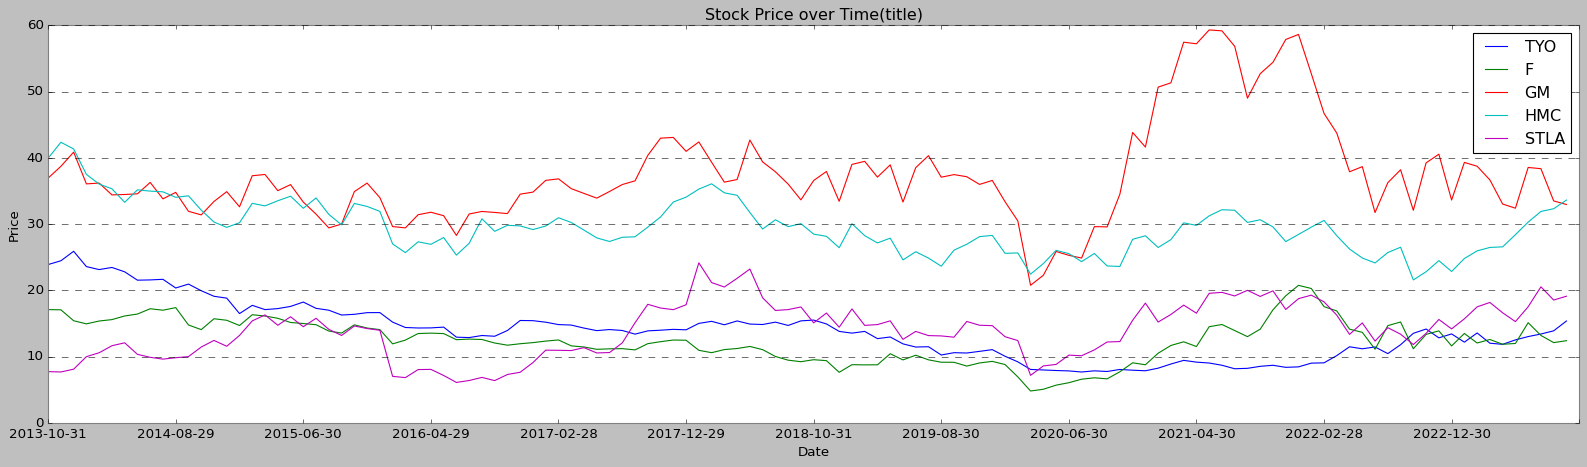

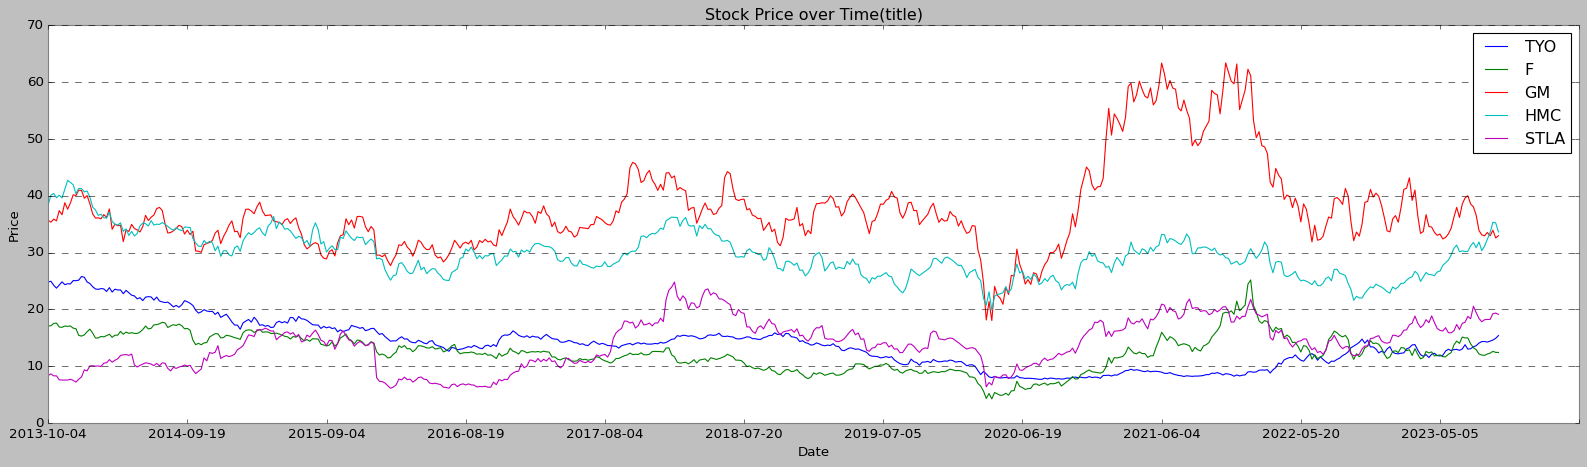

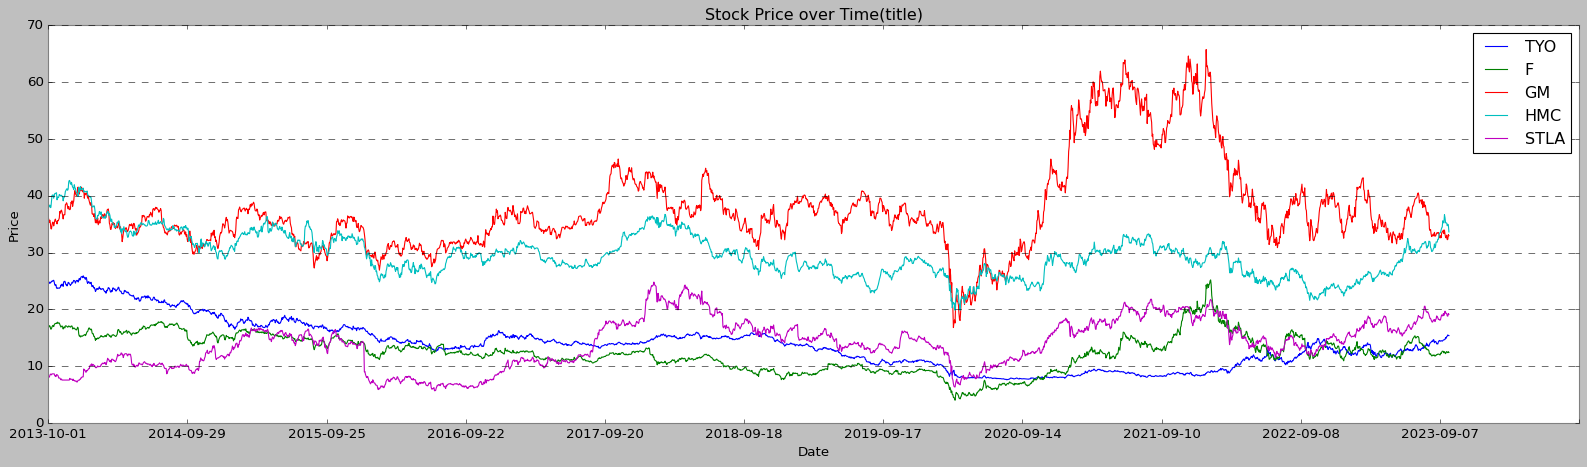

In [96]:
plot_stock_prices('title', df_stock_mo, tickers)
plot_stock_prices('title', df_stock_we, tickers)
plot_stock_prices('title', df_stock_da, tickers)